Image name: img8819_rotate_rescale_augmented.jpg
Landmarks shape: (12, 2)
First 4 Landmarks: [[128.43703   34.245525]
 [113.11426   52.72173 ]
 [133.7509    61.66158 ]
 [149.46739   50.35827 ]]


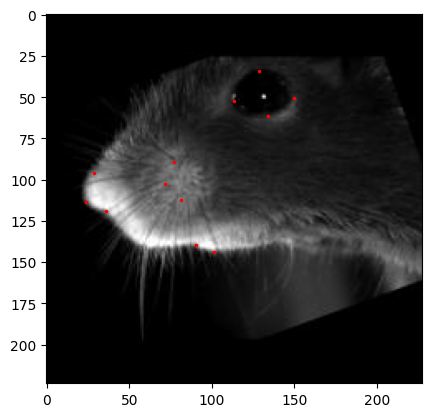

0 (224, 228, 3) (12, 2)


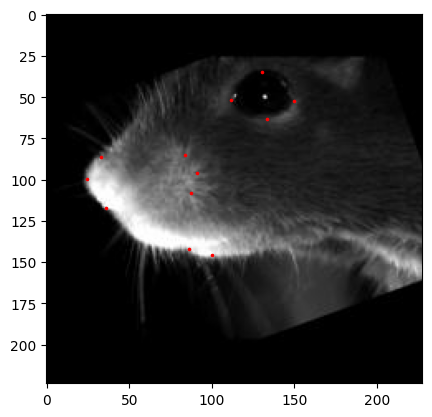

1 (224, 228, 3) (12, 2)


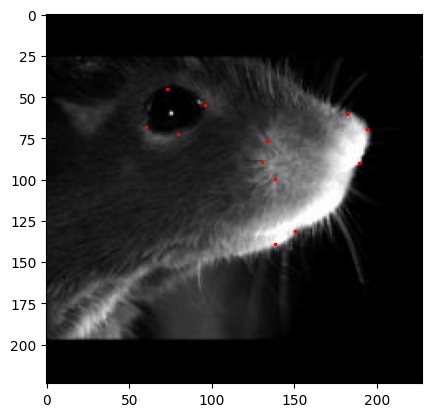

2 (224, 228, 3) (12, 2)


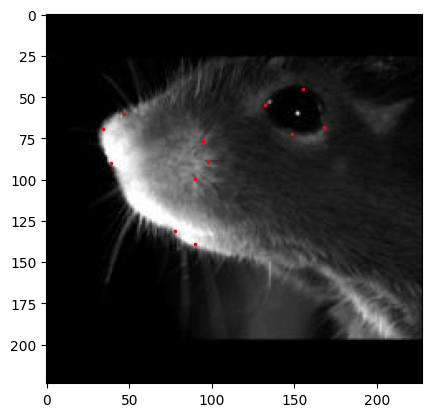

3 (224, 228, 3) (12, 2)


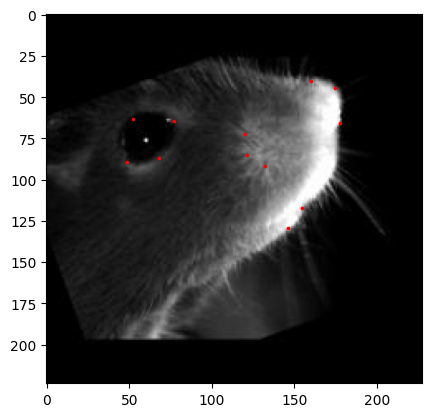

4 (224, 228, 3) (12, 2)


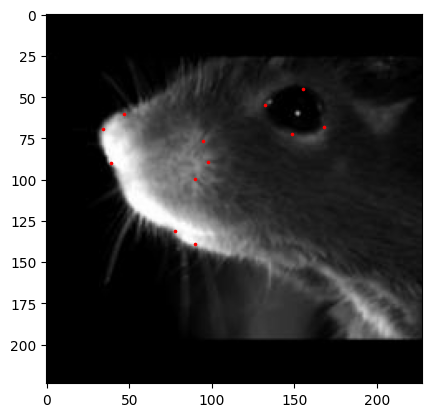

5 (224, 228, 3) (12, 2)


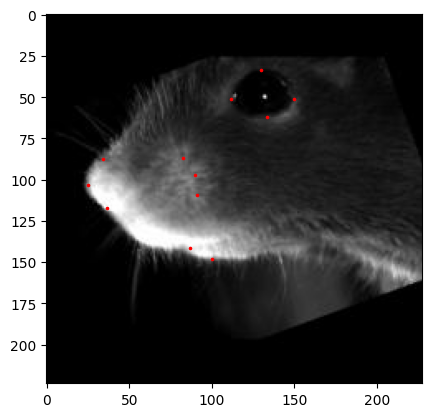

6 (224, 228, 3) (12, 2)


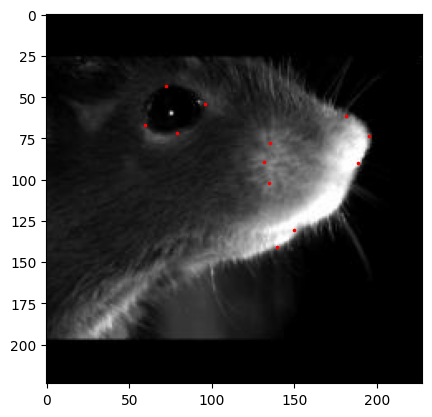

7 (224, 228, 3) (12, 2)


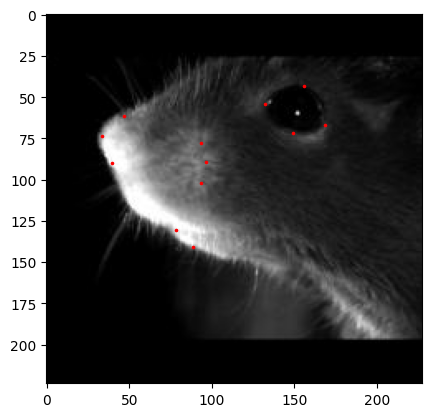

8 (224, 228, 3) (12, 2)


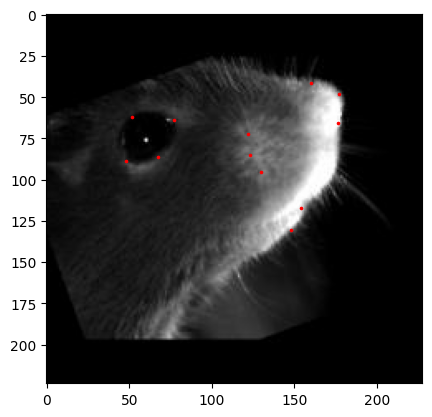

9 (224, 228, 3) (12, 2)


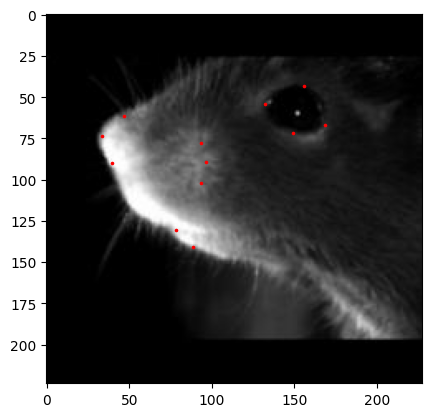

10 (224, 228, 3) (12, 2)


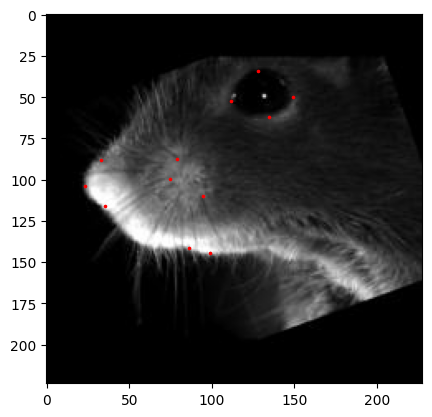

In [4]:
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

landmarks_frame = pd.read_csv('predictions_2.csv')

n = 10
img_name = landmarks_frame.iloc[n, 0]
landmarks = landmarks_frame.iloc[n, 1:]
landmarks = np.asarray(landmarks, dtype=float).reshape(-1, 2)

print('Image name: {}'.format(img_name))
print('Landmarks shape: {}'.format(landmarks.shape))
print('First 4 Landmarks: {}'.format(landmarks[:4]))

plt.ion()   # interactive mode

def show_landmarks(image, landmarks):
    """Show image with landmarks"""
    plt.imshow(image)
    plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.', c='r')
    plt.pause(0.001)  # pause a bit so that plots are updated

plt.figure()
show_landmarks(io.imread(os.path.join('augmented_data_test/', img_name)),
               landmarks)
plt.show()

class FaceLandmarksDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Arguments:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.landmarks_frame.iloc[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[idx, 1:]
        landmarks = np.array([landmarks], dtype=float).reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample
    

face_dataset = FaceLandmarksDataset(csv_file="augmented_data/augmented_labels.csv",
                                           root_dir="augmented_data/")

fig = plt.figure()

for i, sample in enumerate(face_dataset):
    print(i, sample['image'].shape, sample['landmarks'].shape)

    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_landmarks(**sample)

    if i == 10:
        plt.show()
        break

In [ ]:
preds = [1,2]
labels = [2,2]

np.mean(preds == labels)

In [ ]:

tensor_a = torch.tensor([1, 2, 3, 4, 5])
torch.argmax(tensor_a)